In [2]:
%matplotlib inline
import scipy.ndimage.filters as flt
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
from skimage import feature, data
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import helper
from skimage import morphology

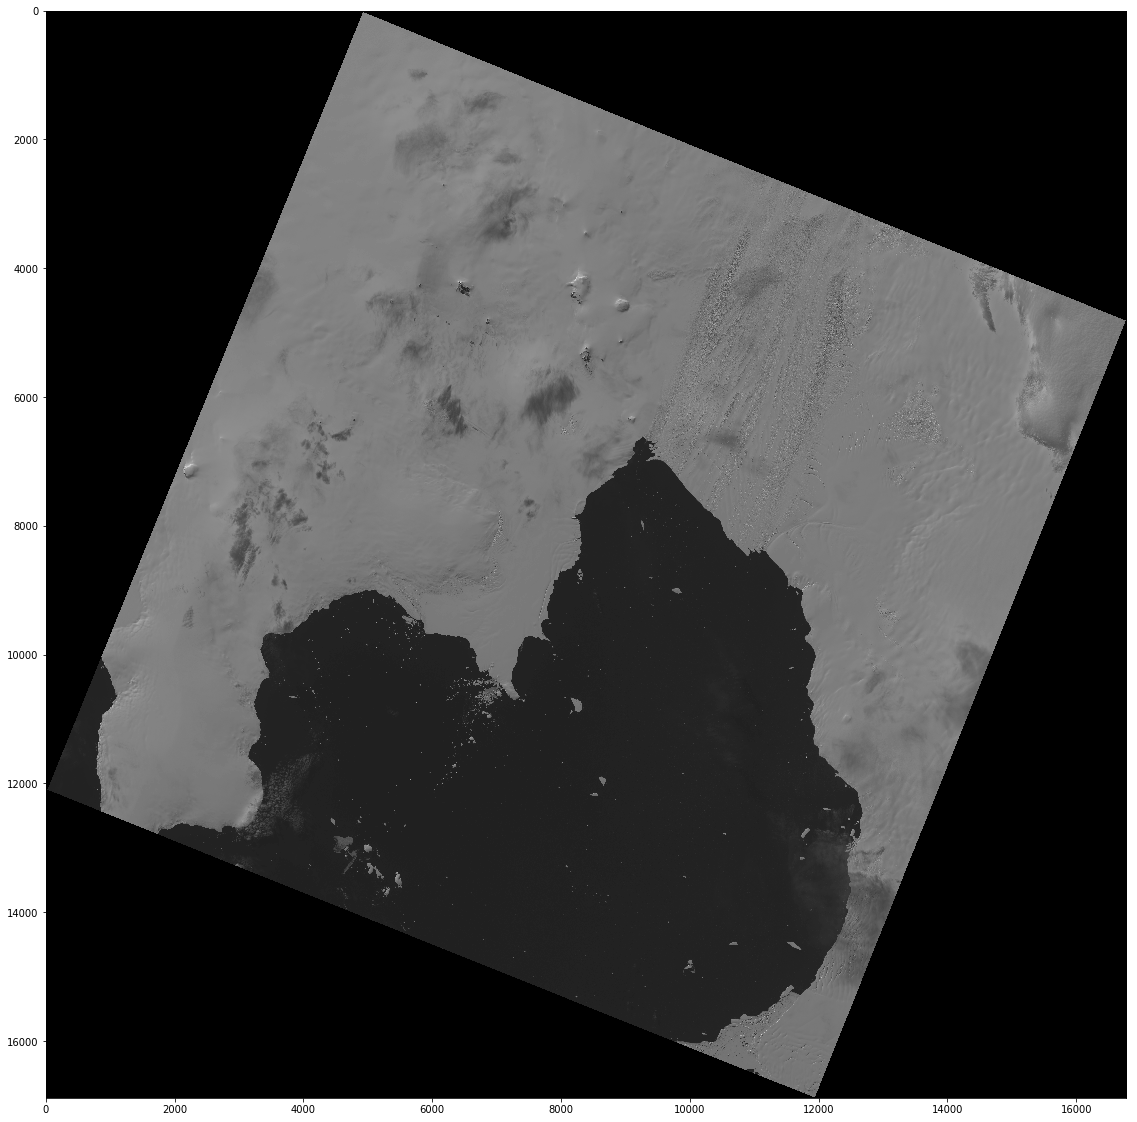

In [2]:
img= plt.imread("/home/zbarnes/Pictures/LC08_L1GT_001113_20170124_20170311_01_T2_B8.TIF")
plt.figure(figsize = (20,20))
plt.imshow(img, cmap='gray')

(array([1.16764963e+08, 5.52458650e+07, 9.34157000e+05, 3.37014700e+06,
        6.39865450e+07, 4.27427310e+07, 2.16572000e+05, 1.63410000e+04,
        2.60600000e+03, 1.34000000e+02]),
 array([    0. ,  4646.4,  9292.8, 13939.2, 18585.6, 23232. , 27878.4,
        32524.8, 37171.2, 41817.6, 46464. ]),
 <a list of 10 Patch objects>)

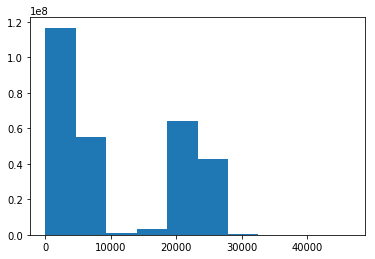

In [3]:
plt.hist(img.flat)

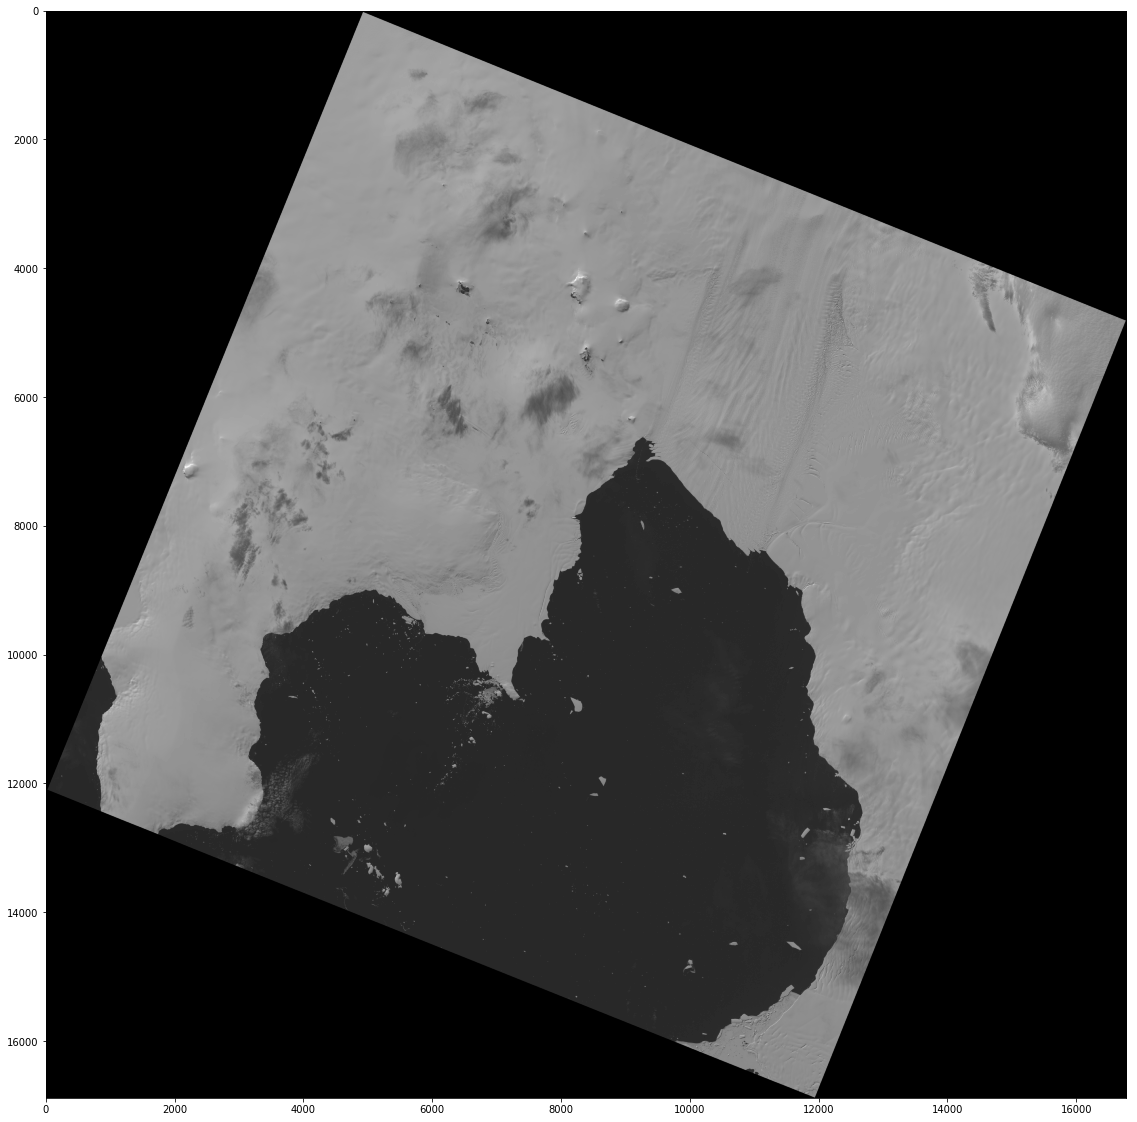

In [4]:
gimg=flt.gaussian_filter(img,5)
plt.figure(figsize = (20,20))
plt.imshow(gimg, cmap='gray')

(array([1.16595092e+08, 5.39359090e+07, 2.00026800e+06, 1.15142500e+06,
        4.03255500e+06, 7.28721750e+07, 3.25769030e+07, 1.04039000e+05,
        8.95400000e+03, 2.74100000e+03]),
 array([    0. ,  3908.3,  7816.6, 11724.9, 15633.2, 19541.5, 23449.8,
        27358.1, 31266.4, 35174.7, 39083. ]),
 <a list of 10 Patch objects>)

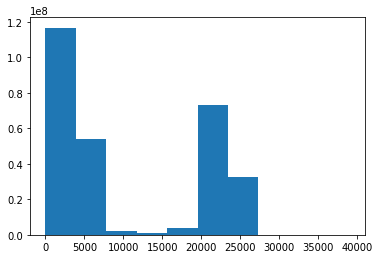

In [5]:
plt.hist(gimg.flat)

In [8]:
#Source: Instruments & Data Tools
#Inspired from the Vector Quantization Example
def km_clust(array, n_clusters):
    
    # Create a line array
    X = array.reshape((-1, 1))
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(X)

    # Get the coordinates of the clusters centres as a 1D array
    values = k_m.cluster_centers_.squeeze()

    # Get the label of each point
    labels = k_m.labels_

    return(values, labels)

In [7]:
# Group similar grey levels using 3 clusters
values, labels = km_clust(gimg, n_clusters = 3)

# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape

# Get the values of min and max intensity in the original image
#vmin = img.min()
#vmax = img.max()

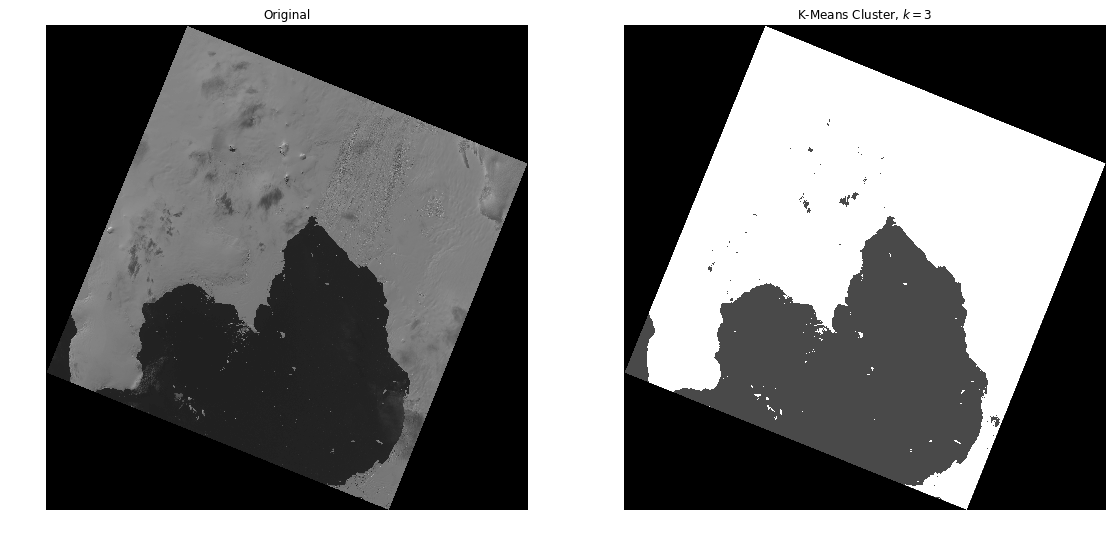

In [16]:
imgs = [img, img_segm]
labelz = ['Original', 'K-Means Cluster, $k=3$']
show_images(images=imgs, cols=1,titles= labelz)

(array([1.16555659e+08, 0.00000000e+00, 5.66528170e+07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.10071585e+08]),
 array([4.17461460e+00, 2.27255545e+03, 4.54093629e+03, 6.80931713e+03,
        9.07769796e+03, 1.13460788e+04, 1.36144596e+04, 1.58828405e+04,
        1.81512213e+04, 2.04196022e+04, 2.26879830e+04]),
 <a list of 10 Patch objects>)

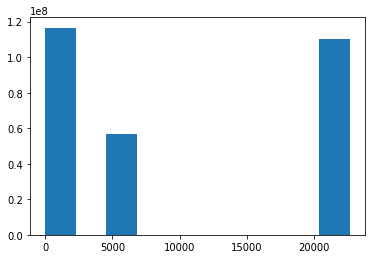

In [64]:
plt.hist(img_segm.flat)

In [7]:
from skimage.filters import threshold_local

In [35]:
block_size1 = 19
binary_adaptive1 = threshold_local(img_segm, block_size1)
show1 = img_segm > binary_adaptive1

block_size2 = 31
binary_adaptive2 = threshold_local(img_segm, block_size2)
show2 = img_segm > binary_adaptive2

block_size3 = 65
binary_adaptive3 = threshold_local(img_segm, block_size3)
show3 = img_segm > binary_adaptive3

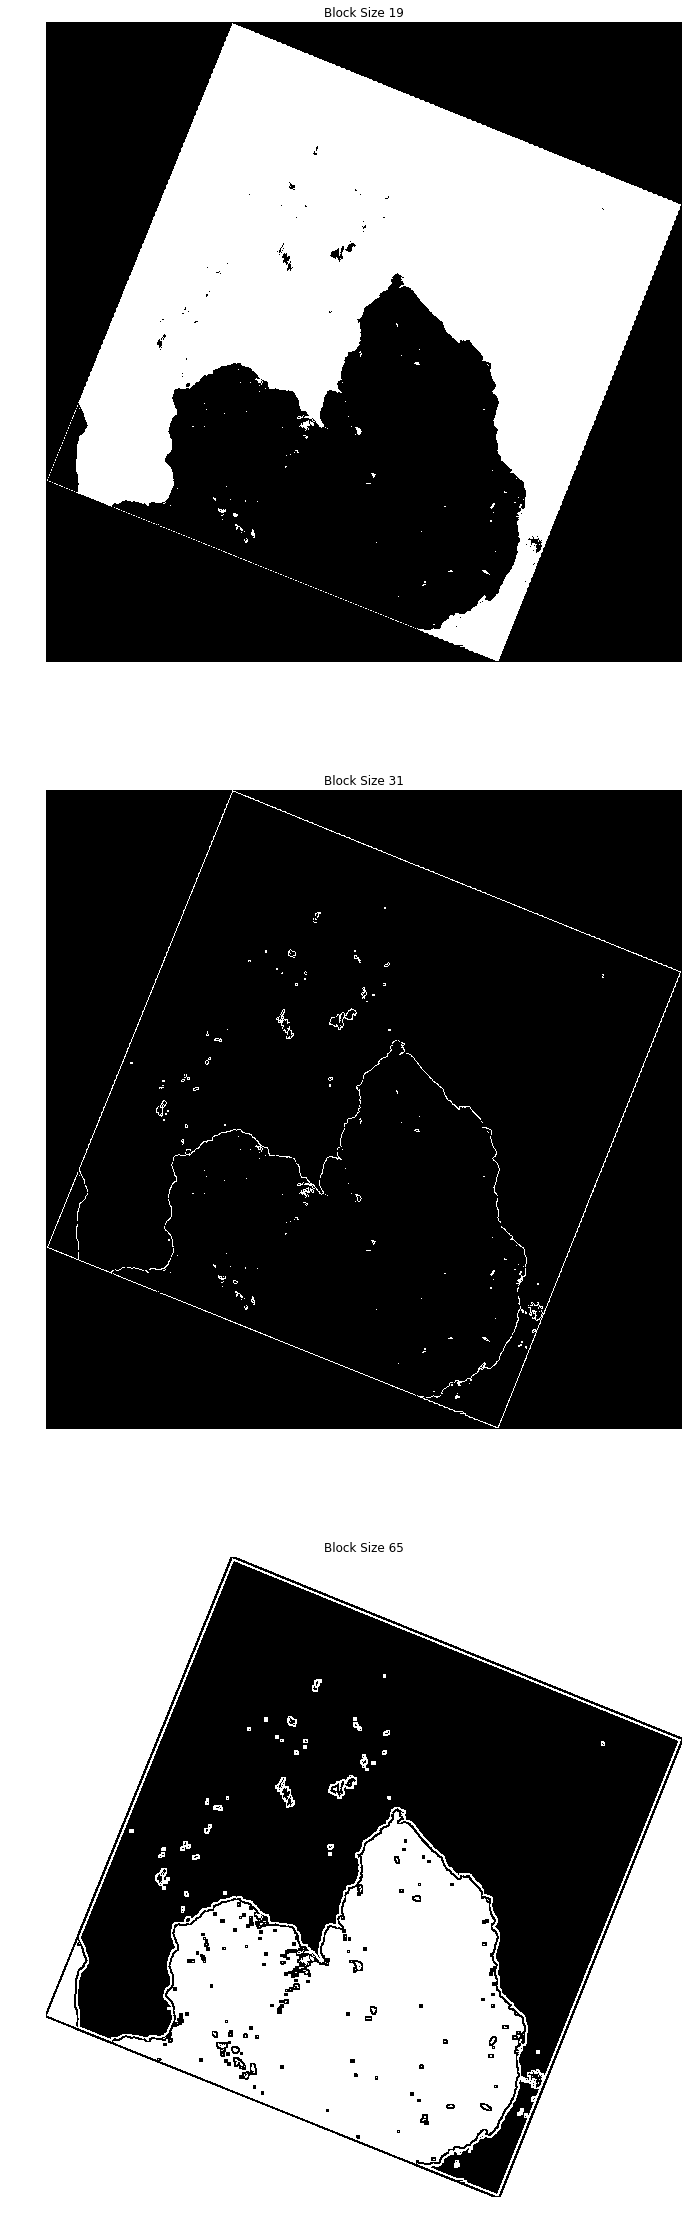

In [67]:
fig, axes = plt.subplots(nrows=3, figsize=(40, 40))
ax0, ax1, ax2 = axes
#plt.gray()

ax0.imshow(show1)
ax0.set_title('Block Size 19')

ax1.imshow(show2)
ax1.set_title('Block Size 31')

ax2.imshow(show3)
ax2.set_title('Block Size 65')

for ax in axes:
    ax.axis('off')

plt.show()

In [36]:
small = morphology.remove_small_objects(show2, 100000)

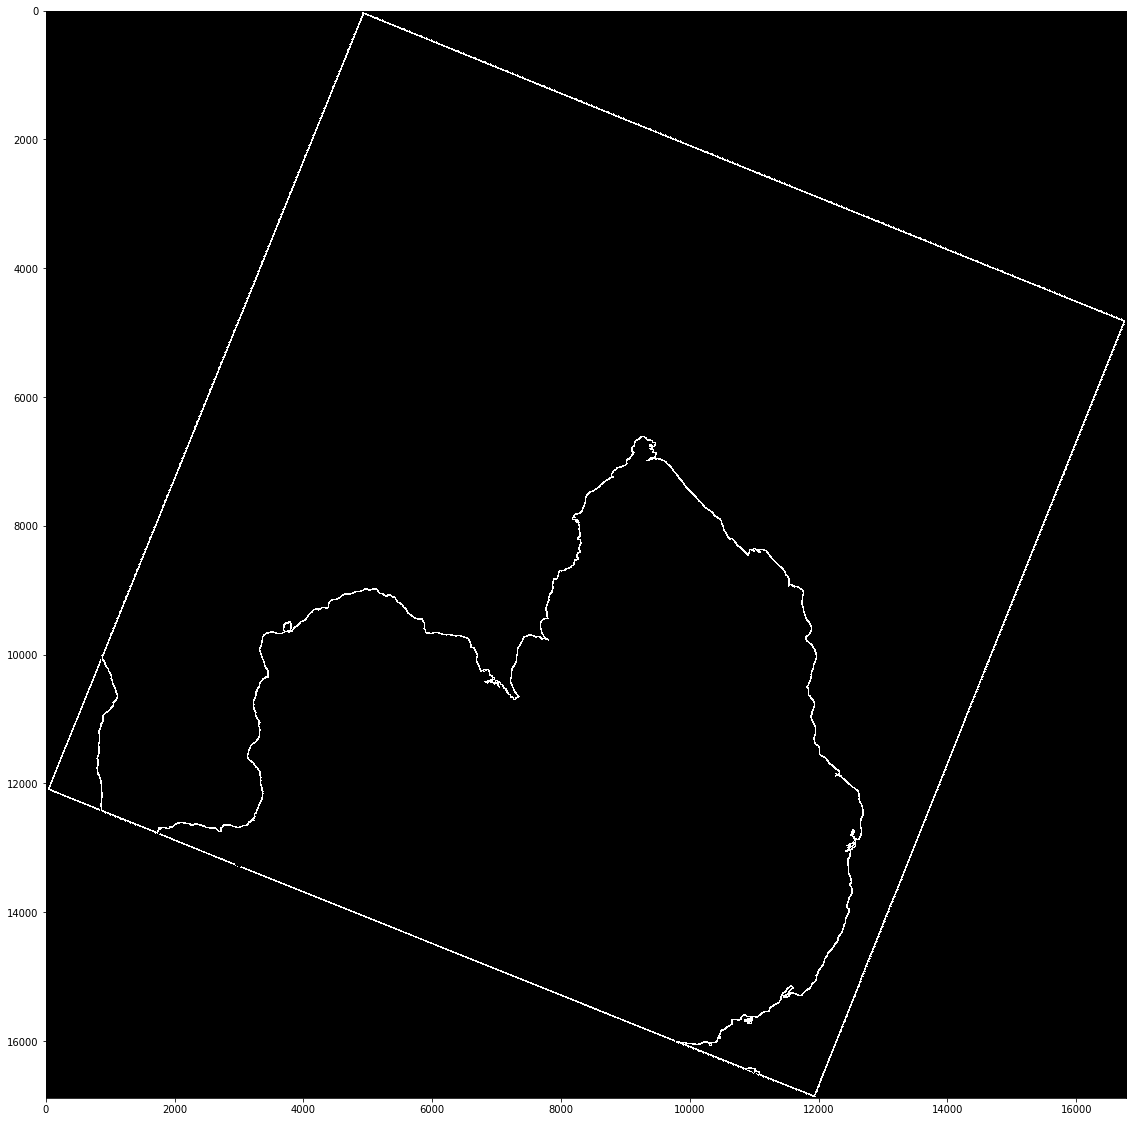

In [37]:
plt.figure(figsize = (20,20))
plt.imshow(small)

plt.show()

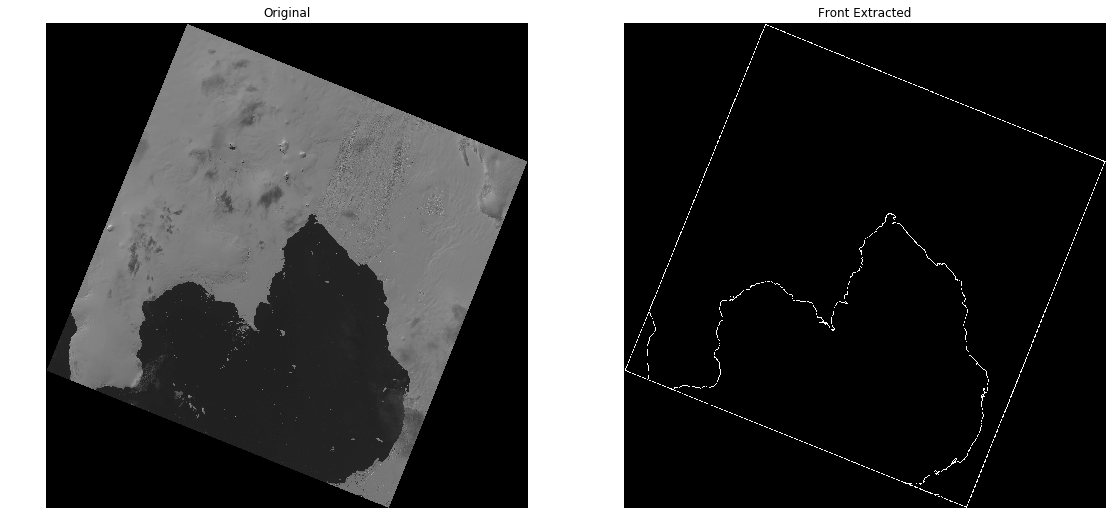

In [38]:
show_images([img, small], 1, ['Original', 'Front Extracted'])

In [20]:
img2 = data.imread('LC08_L1GT_161132_20171227_20180103_01_T2_B5.TIF')

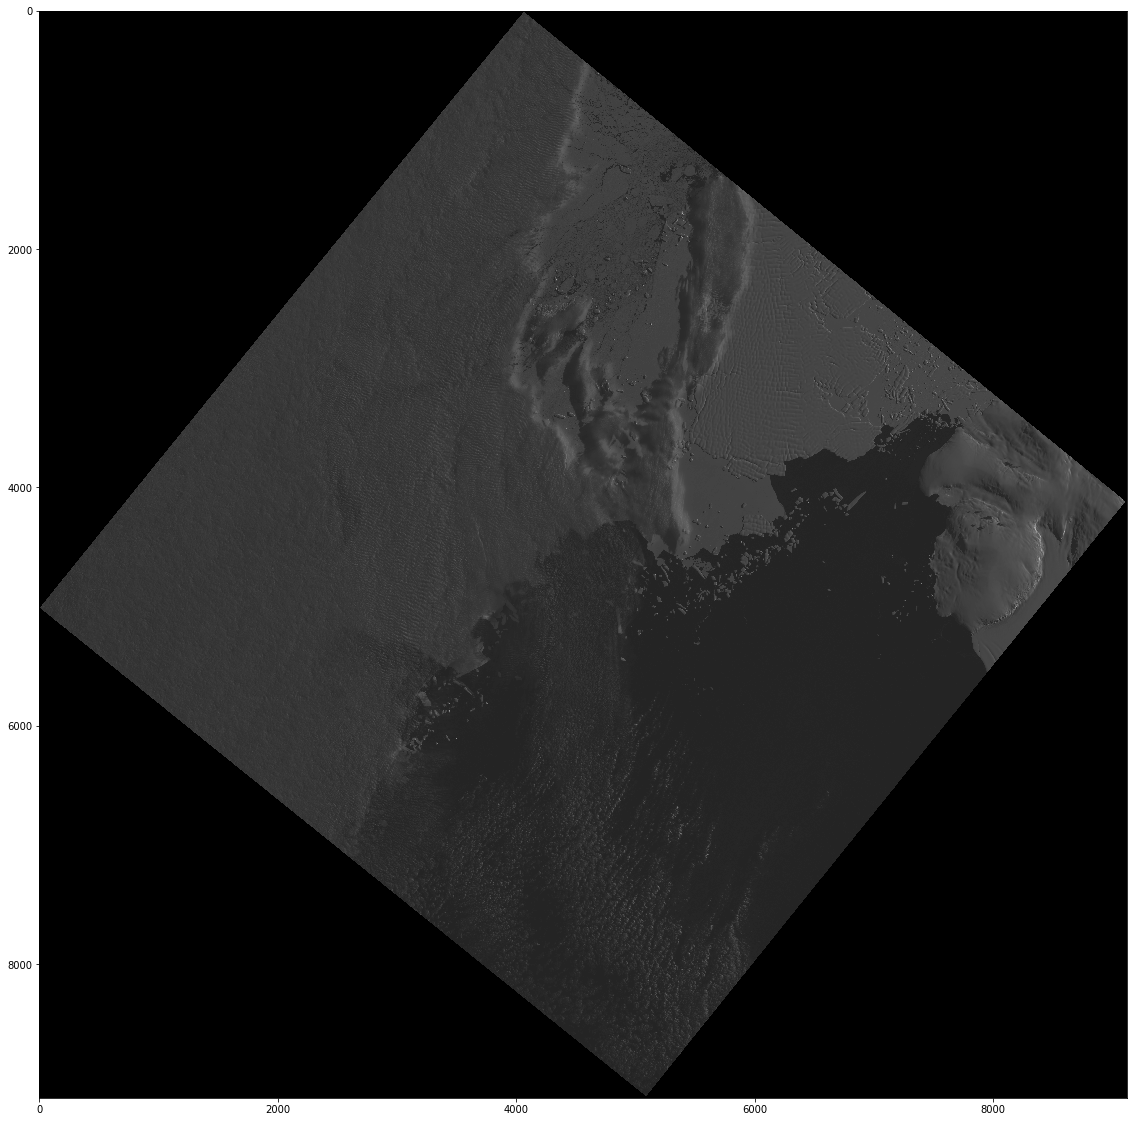

In [21]:
plt.figure(figsize = (20,20))
plt.imshow(img2)

(array([4.1340692e+07, 1.7047119e+07, 2.3551353e+07, 1.2039590e+06,
        4.2555000e+04, 5.5170000e+03, 1.1630000e+03, 2.5800000e+02,
        2.4000000e+01, 1.0000000e+00]),
 array([    0. ,  3509.7,  7019.4, 10529.1, 14038.8, 17548.5, 21058.2,
        24567.9, 28077.6, 31587.3, 35097. ]),
 <a list of 10 Patch objects>)

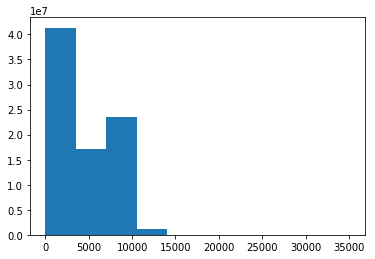

In [22]:
plt.hist(img2.flat)

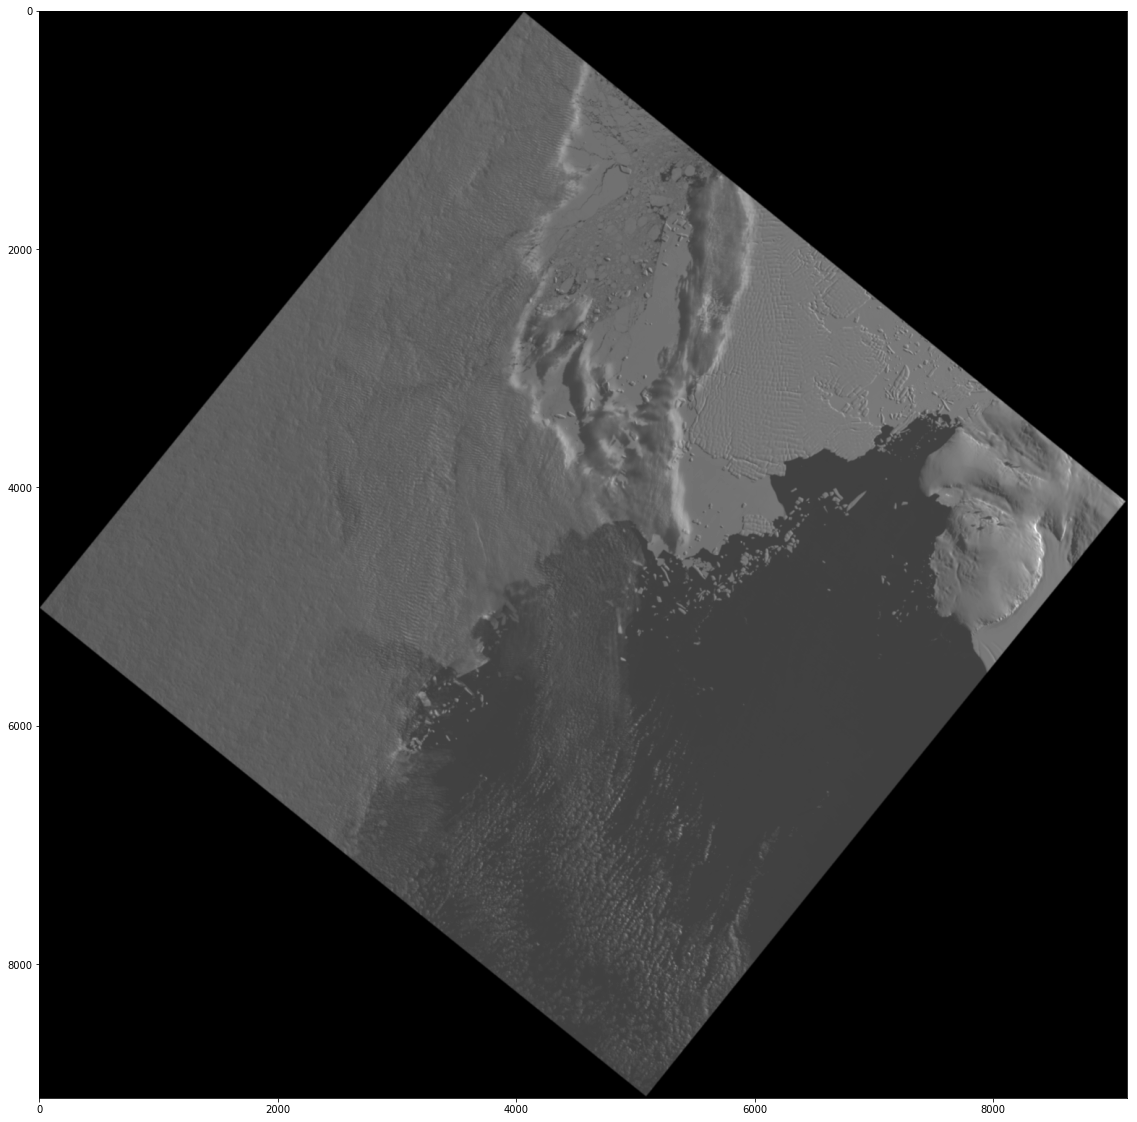

In [23]:
gimg=flt.gaussian_filter(img2,5)
plt.figure(figsize = (20,20))
plt.imshow(gimg)

(array([4.1265877e+07, 9.9823000e+04, 1.3783215e+07, 1.7436131e+07,
        9.2518230e+06, 1.1840180e+06, 1.5811100e+05, 1.0147000e+04,
        2.6790000e+03, 8.1700000e+02]),
 array([    0. ,  2048.2,  4096.4,  6144.6,  8192.8, 10241. , 12289.2,
        14337.4, 16385.6, 18433.8, 20482. ]),
 <a list of 10 Patch objects>)

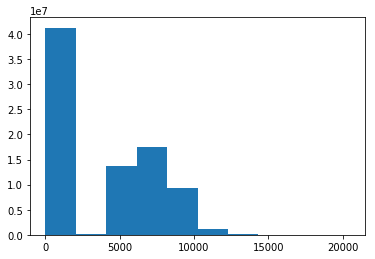

In [24]:
plt.hist(gimg.flat)

In [25]:
# Group similar grey levels using 8 clusters
values, labels = km_clust(gimg, n_clusters = 3)

# Create the segmented array from labels and values
img_segm2 = np.choose(labels, values)
# Reshape the array as the original image
img_segm2.shape = gimg.shape

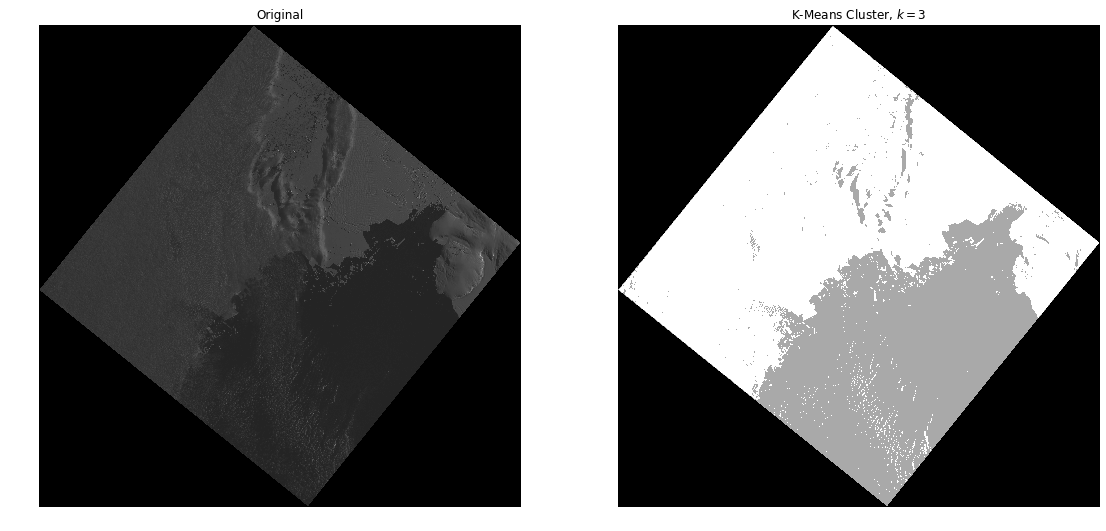

In [26]:
show_images([img2, img_segm2], 1, ['Original', 'K-Means Cluster, $k=3$'])

In [29]:
block_size1 = 19
adap1 = threshold_local(img_segm2, block_size1)
show1 = img_segm2 > adap1

block_size2 = 31
adap2 = threshold_local(img_segm2, block_size2)
show2 = img_segm2 > adap2

block_size3 = 65
adap3 = threshold_local(img_segm2, block_size3)
show3 = img_segm2 > adap3

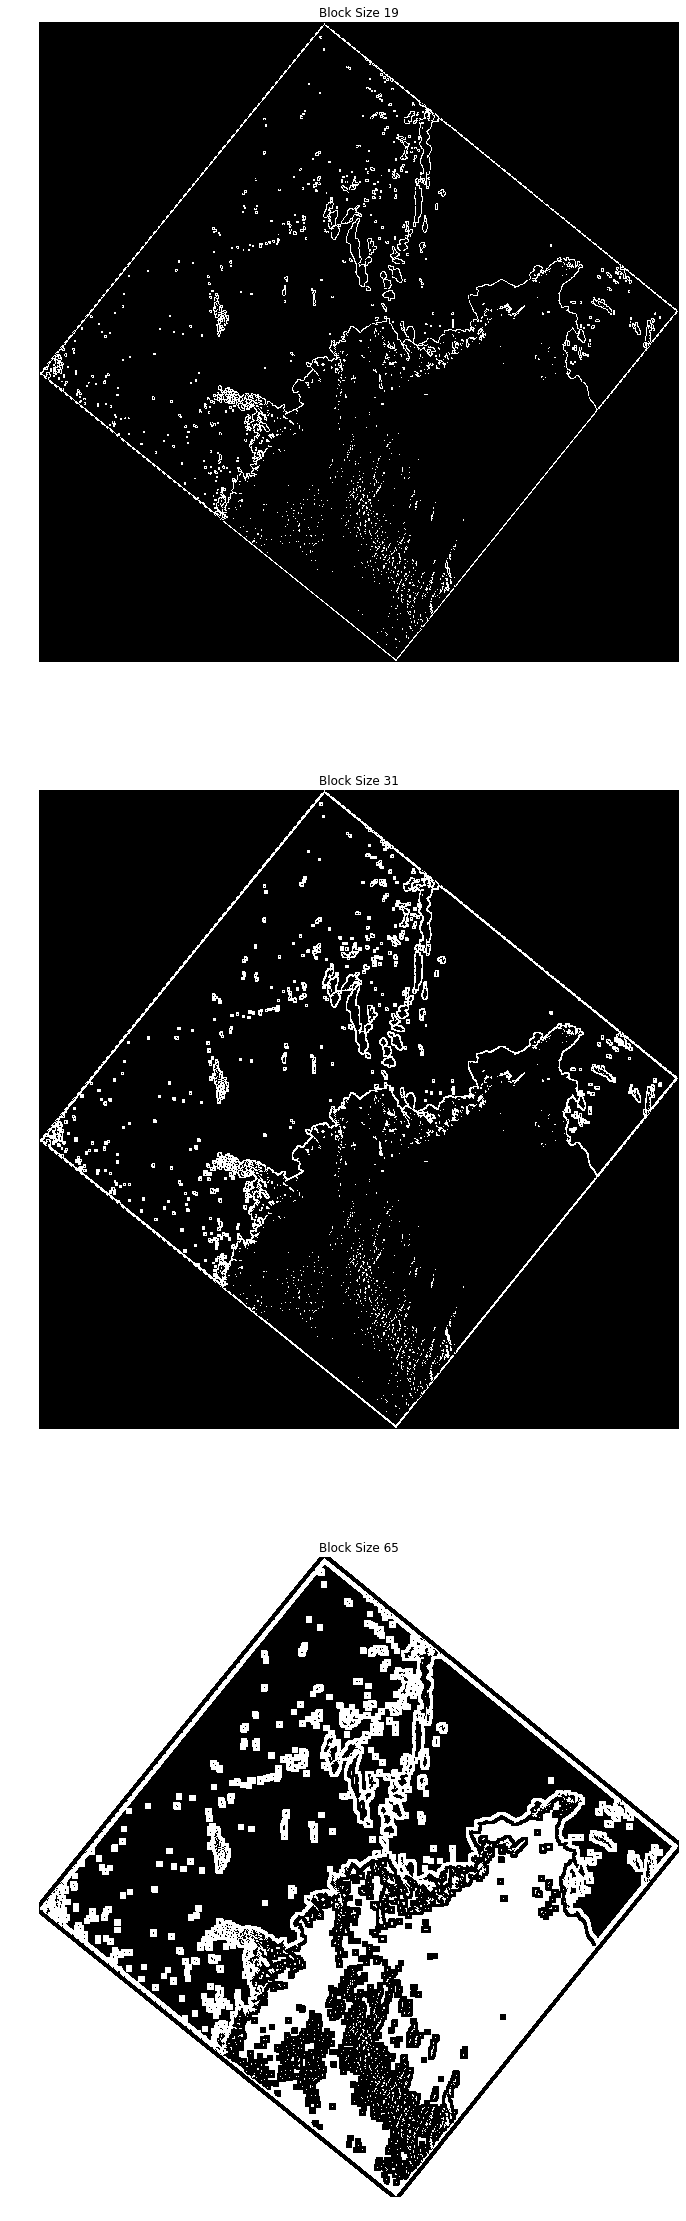

In [76]:
fig, axes = plt.subplots(nrows=3, figsize=(40, 40))
ax0, ax1, ax2 = axes
#plt.gray()

ax0.imshow(show1)
ax0.set_title('Block Size 19')

ax1.imshow(show2)
ax1.set_title('Block Size 31')

ax2.imshow(show3)
ax2.set_title('Block Size 65')

for ax in axes:
    ax.axis('off')

plt.show()

In [30]:
small2 = morphology.remove_small_objects(show1, 100000)

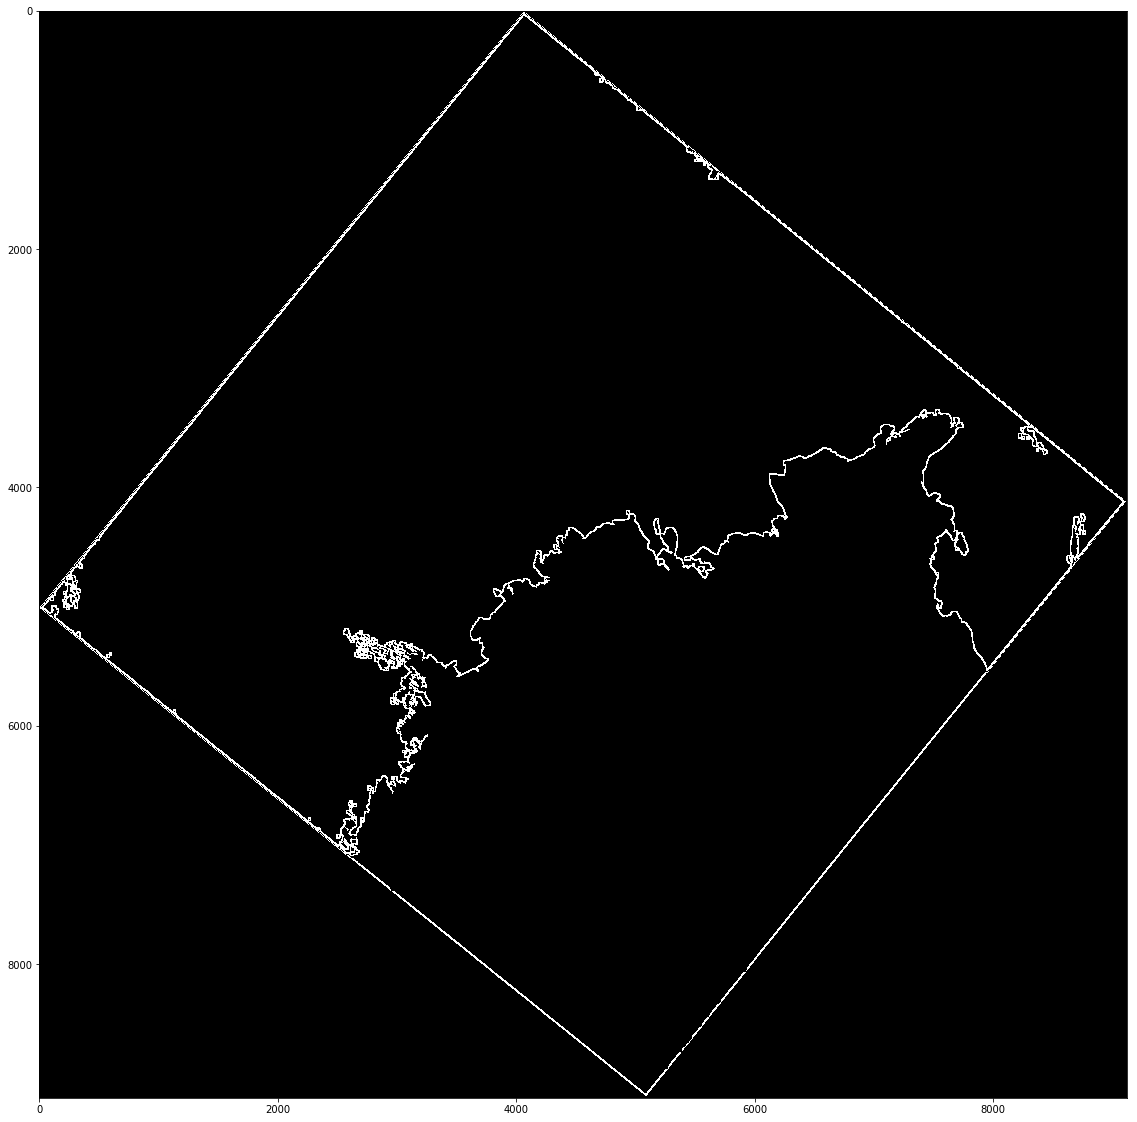

In [31]:
plt.figure(figsize = (20,20))
plt.imshow(small2)

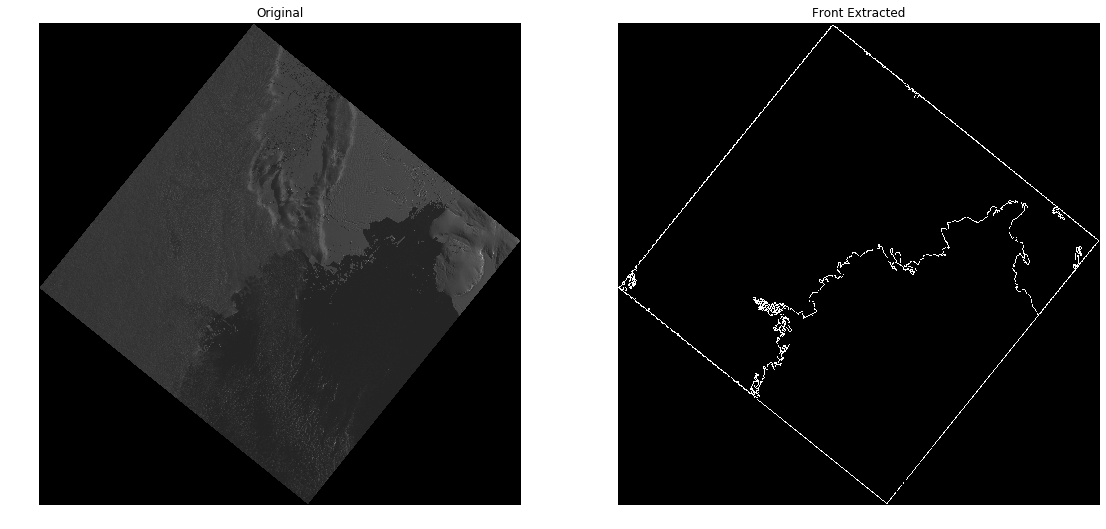

In [32]:
show_images([img2, small2], 1, ['Original', 'Front Extracted'])

In [ ]:
edges2 = feature.canny(small, sigma=2)
edges3 = feature.canny(small, sigma=3)
edges4 = feature.canny(small, sigma=4)

# display results
fig, (ax1, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=4, figsize=(30, 30),
                                    sharex=True, sharey=True)

ax1.imshow(small, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Original image', fontsize=20)

#ax2.imshow(edges1, cmap=plt.cm.gray)
#ax2.axis('off')
#ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=2$', fontsize=20)

ax4.imshow(edges3, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Canny filter, $\sigma=3$', fontsize=20)

ax5.imshow(edges4, cmap=plt.cm.gray)
ax5.axis('off')
ax5.set_title('Canny filter, $\sigma=4$', fontsize=20)

fig.tight_layout()

plt.show()

In [11]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.axis('off')
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images + 7)
plt.show()

In [71]:
lst = [img, small]
img_lst = ['Original Image', 'Extracted Front']

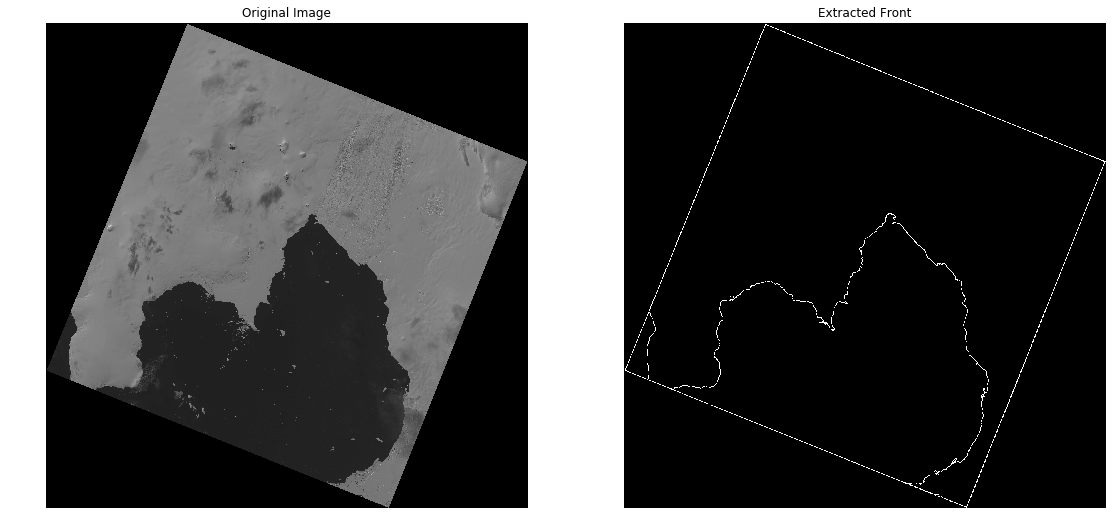

In [72]:
show_images(lst, 1,img_lst)

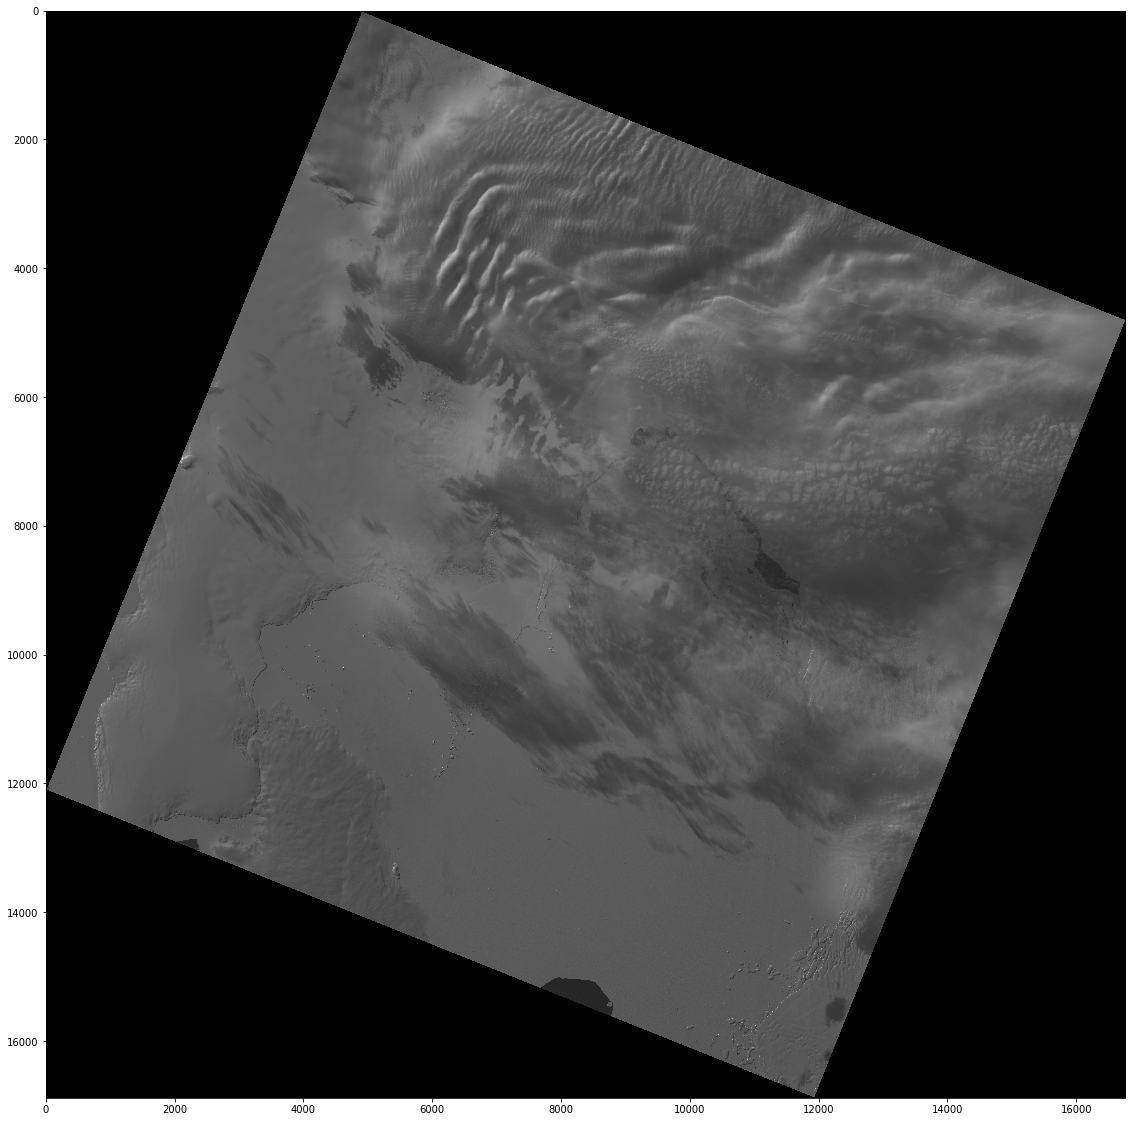

In [18]:
img3 = plt.imread('/home/zbarnes/Pictures/LC08_L1GT_001113_20171007_20171023_01_T2_B8-1.TIF')
plt.figure(figsize = (20,20))
plt.imshow(img3)

(array([1.16412341e+08, 5.78539000e+05, 2.08569140e+07, 1.16792705e+08,
        2.61755860e+07, 2.00224600e+06, 1.14253000e+05, 9.25000000e+03,
        5.47000000e+02, 6.00000000e+01]),
 array([    0.,  3909.,  7818., 11727., 15636., 19545., 23454., 27363.,
        31272., 35181., 39090.]),
 <a list of 10 Patch objects>)

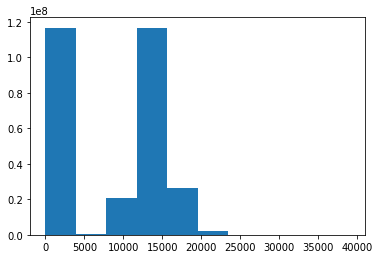

In [19]:
plt.hist(img3.flat)

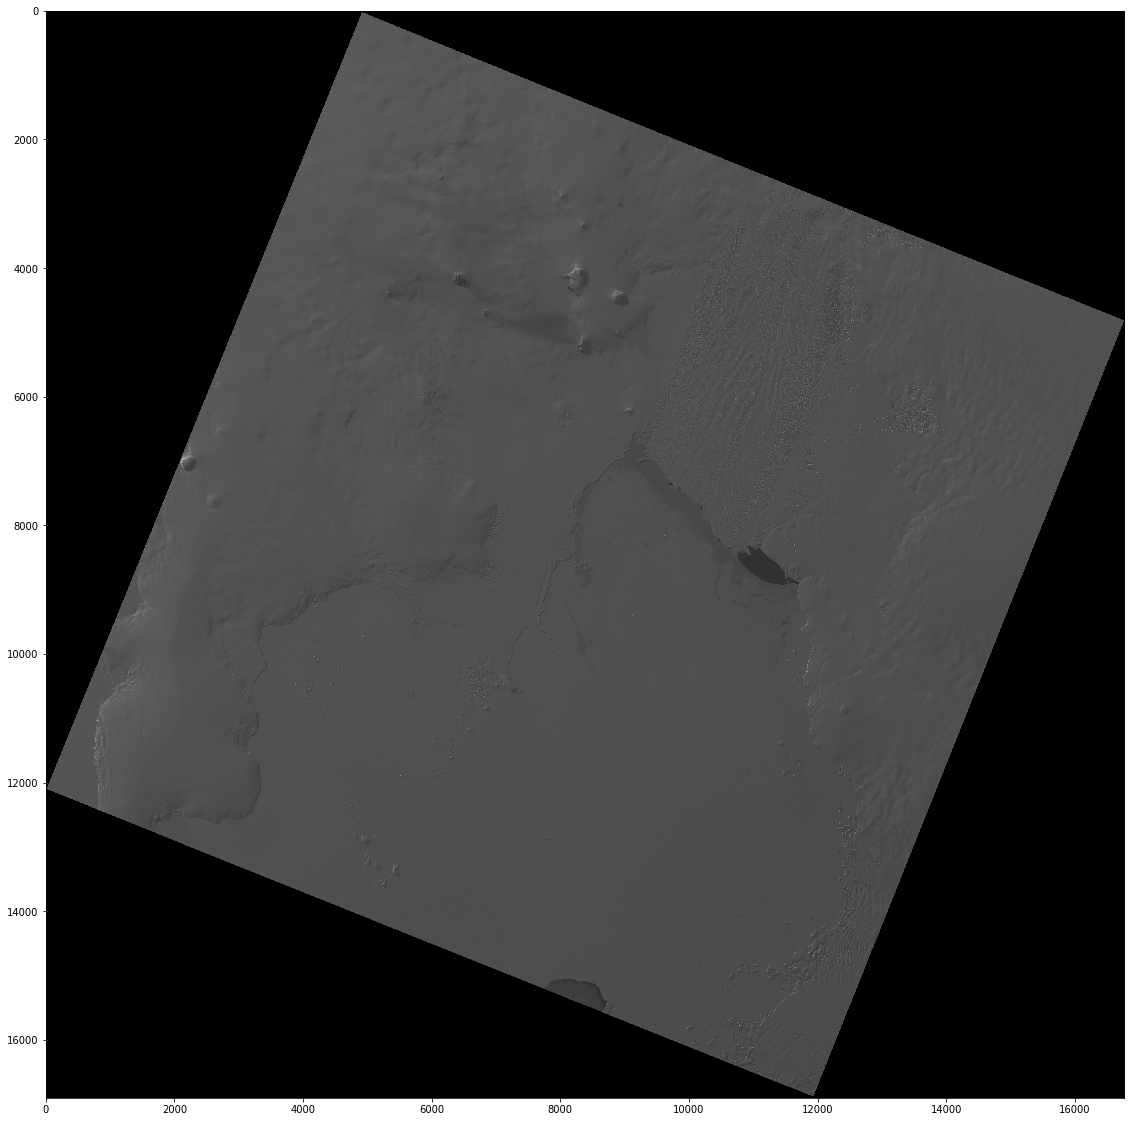

In [39]:
img4 = plt.imread('/home/zbarnes/Pictures/LC08_L1GT_001113_20170921_20171012_01_T2_B8-1.TIF')
plt.figure(figsize = (20,20))
plt.imshow(img4)

(array([1.16744349e+08, 2.66240000e+05, 1.94642500e+07, 1.46450508e+08,
        3.25151000e+05, 2.29410000e+04, 3.58900000e+03, 4.59000000e+02,
        1.53000000e+02, 2.10000000e+01]),
 array([    0. ,  3006.2,  6012.4,  9018.6, 12024.8, 15031. , 18037.2,
        21043.4, 24049.6, 27055.8, 30062. ]),
 <a list of 10 Patch objects>)

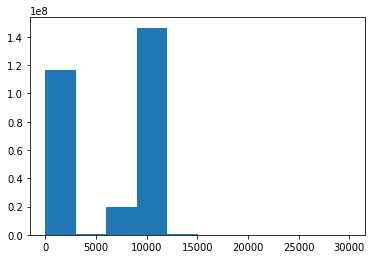

In [40]:
plt.hist(img4.flat)

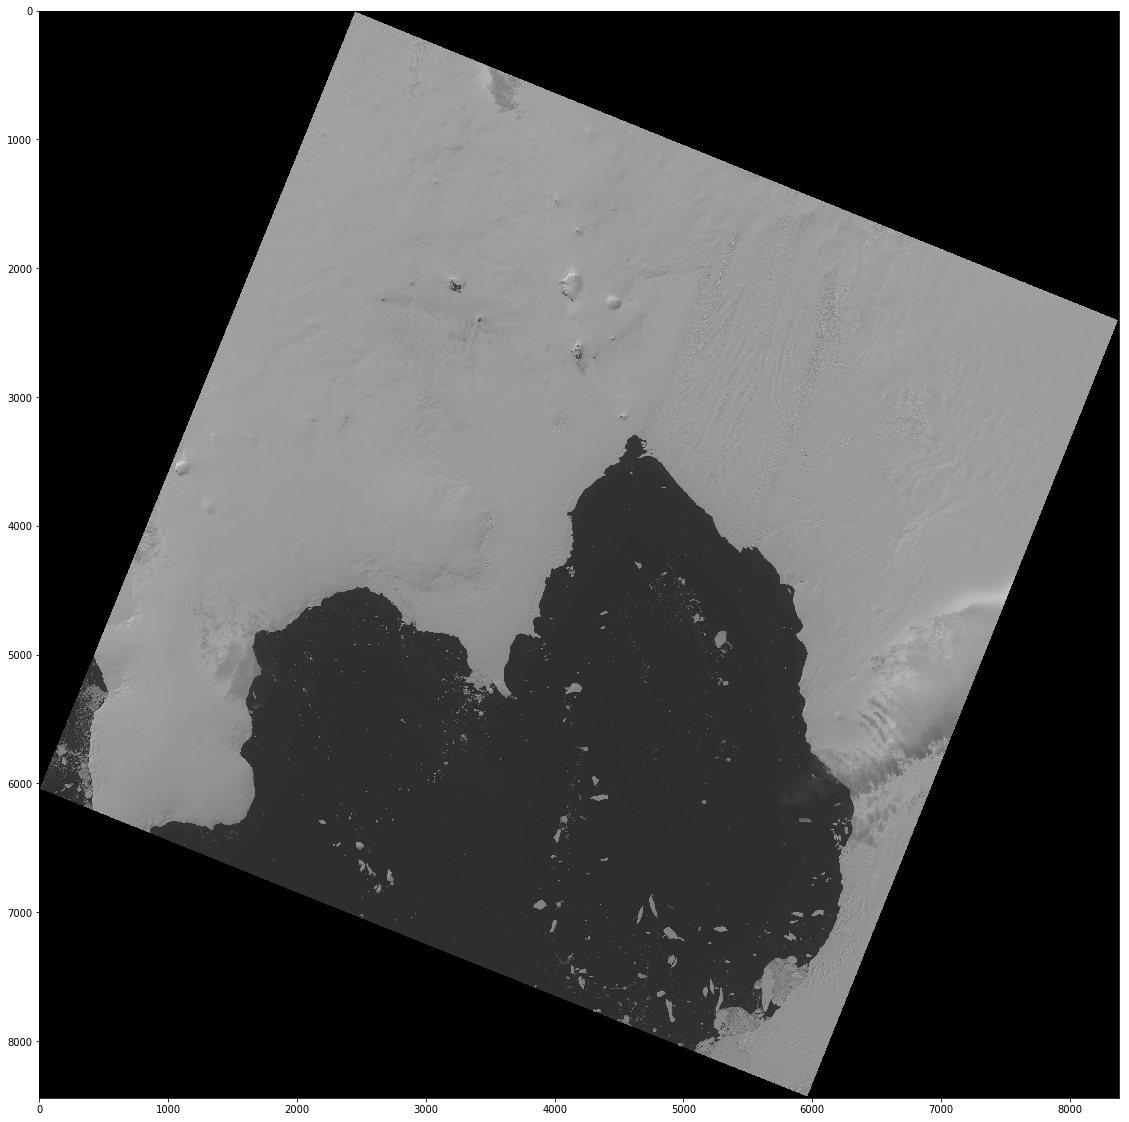

In [4]:
img5 = plt.imread('my.jpeg')
plt.figure(figsize = (20,20))
plt.imshow(img5, cmap='gray')

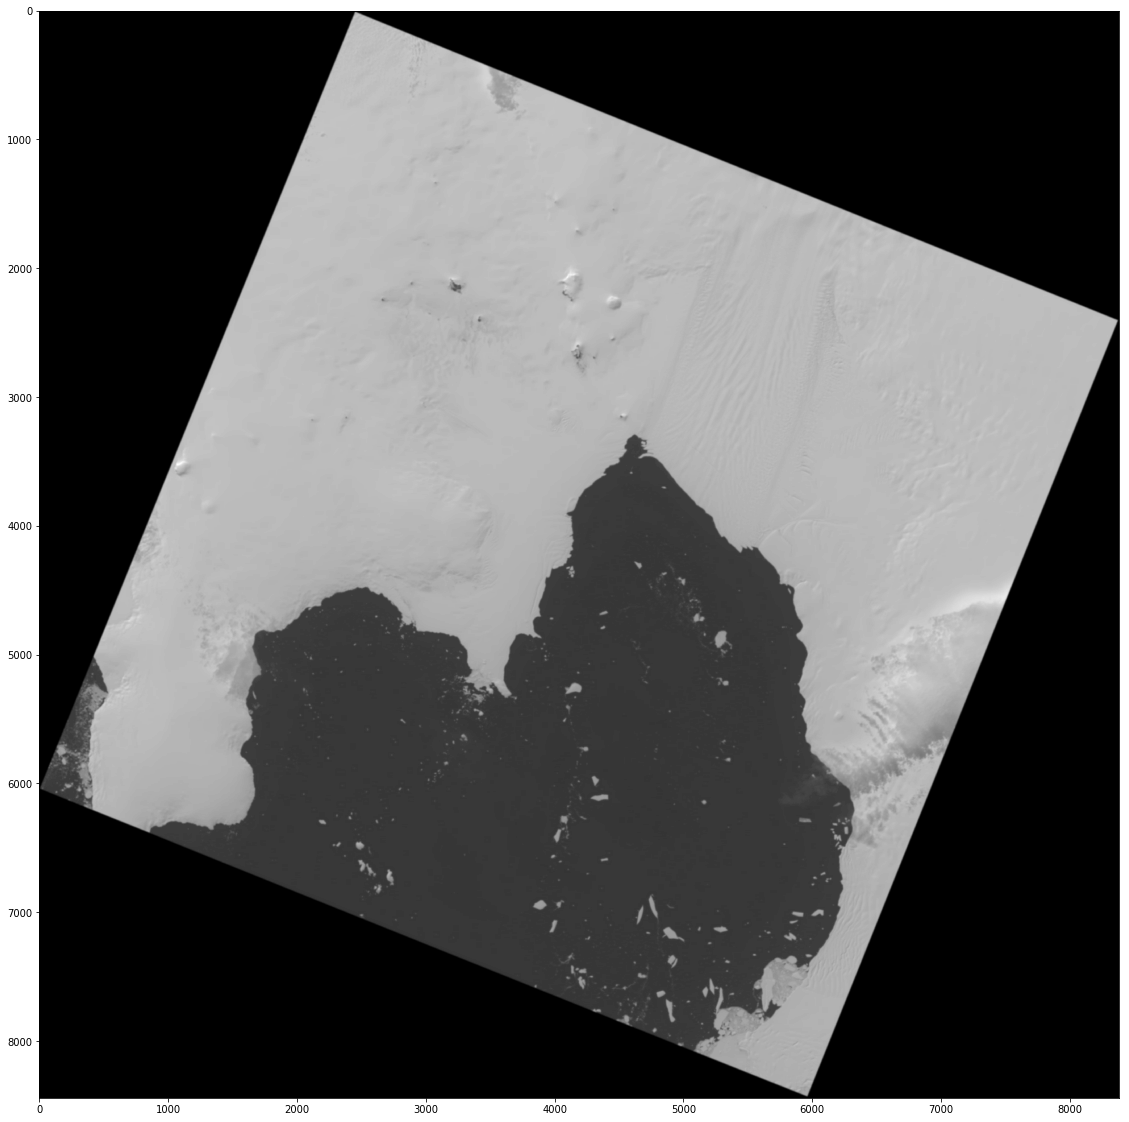

In [5]:
gimg=flt.gaussian_filter(img5,5)
plt.figure(figsize = (20,20))
plt.imshow(gimg, cmap='gray')

In [9]:
# Group similar grey levels using 3 clusters
values, labels = km_clust(gimg, n_clusters = 3)

# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img5.shape

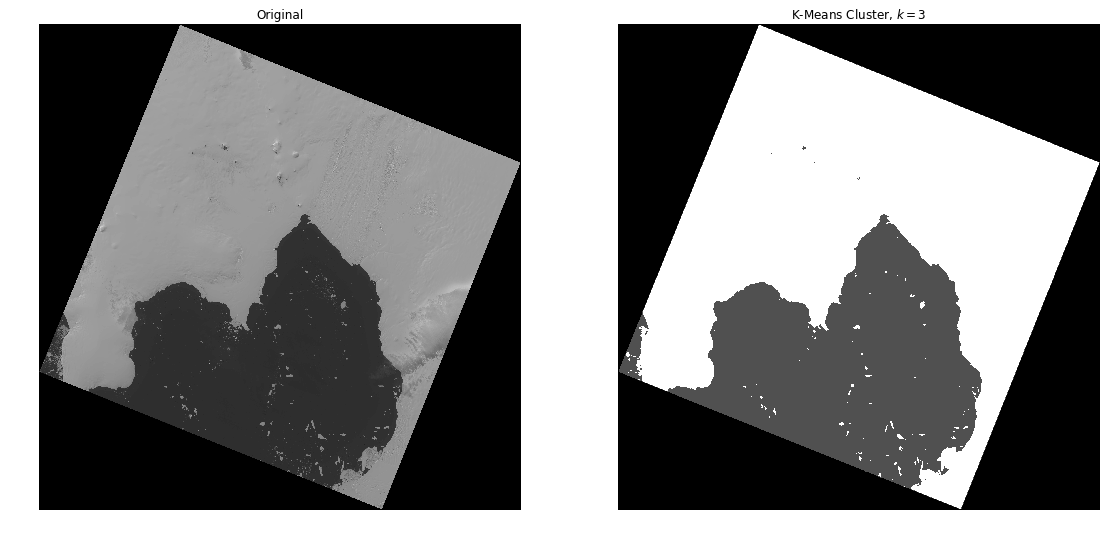

In [12]:
imgs = [img5, img_segm]
labelz = ['Original', 'K-Means Cluster, $k=3$']
show_images(images=imgs, cols=1,titles= labelz)

In [13]:
block_size1 = 19
binary_adaptive1 = threshold_local(img_segm, block_size1)
show1 = img_segm > binary_adaptive1

block_size2 = 31
binary_adaptive2 = threshold_local(img_segm, block_size2)
show2 = img_segm > binary_adaptive2

block_size3 = 65
binary_adaptive3 = threshold_local(img_segm, block_size3)
show3 = img_segm > binary_adaptive3

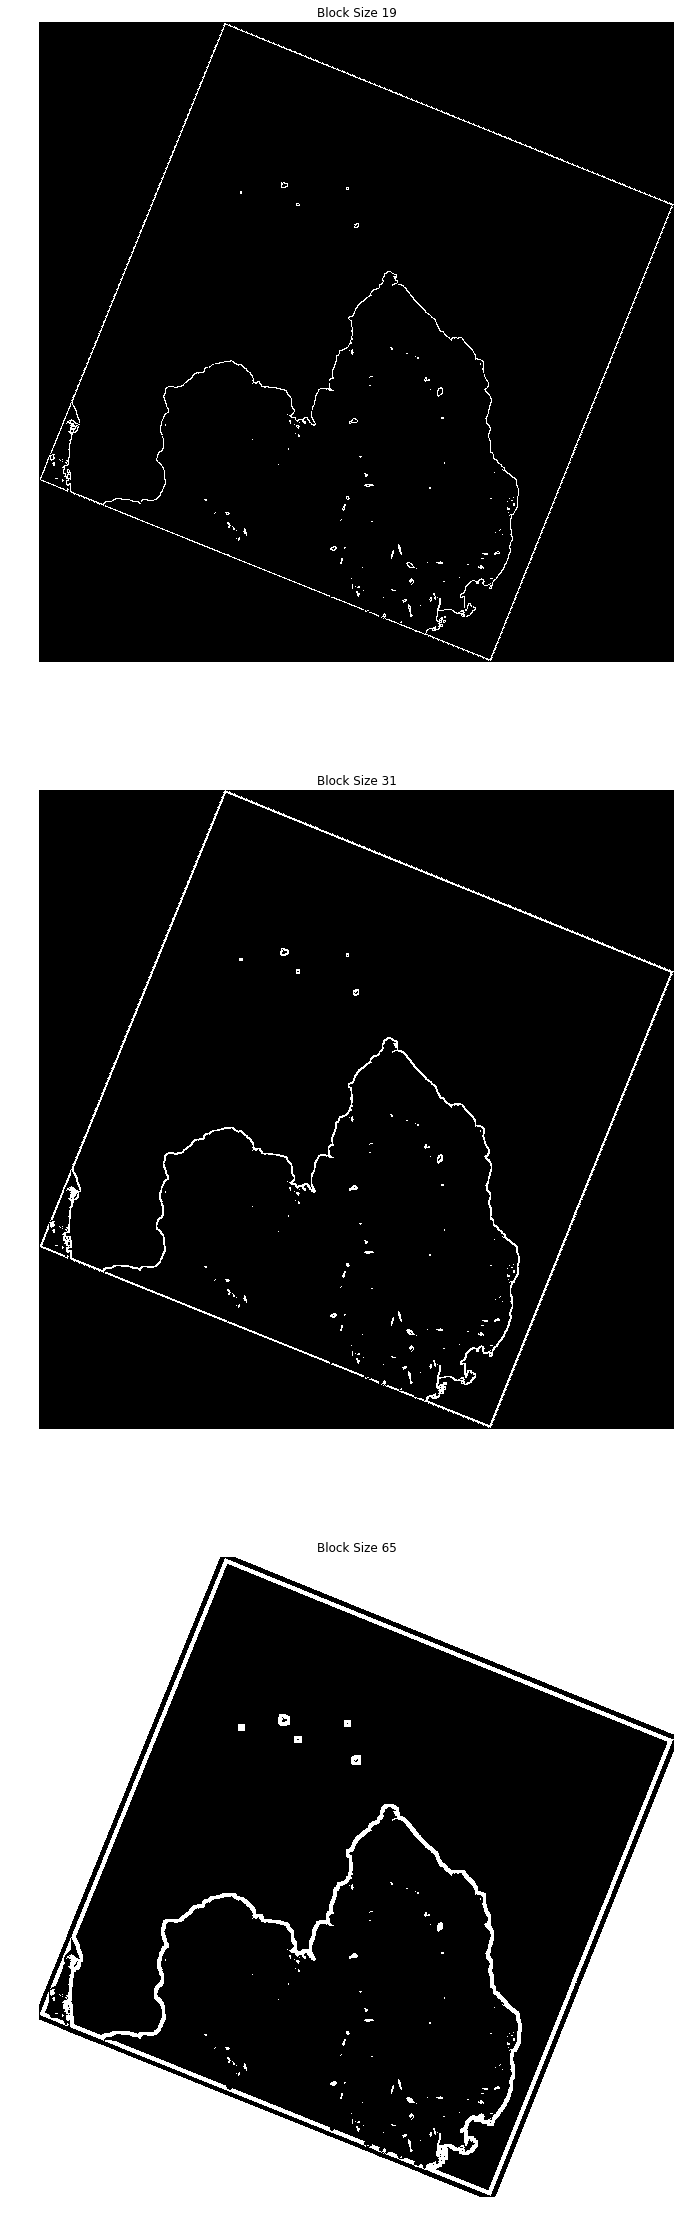

In [14]:
fig, axes = plt.subplots(nrows=3, figsize=(40, 40))
ax0, ax1, ax2 = axes
#plt.gray()

ax0.imshow(show1)
ax0.set_title('Block Size 19')

ax1.imshow(show2)
ax1.set_title('Block Size 31')

ax2.imshow(show3)
ax2.set_title('Block Size 65')

for ax in axes:
    ax.axis('off')

plt.show()

In [15]:
small = morphology.remove_small_objects(show2, 100000)

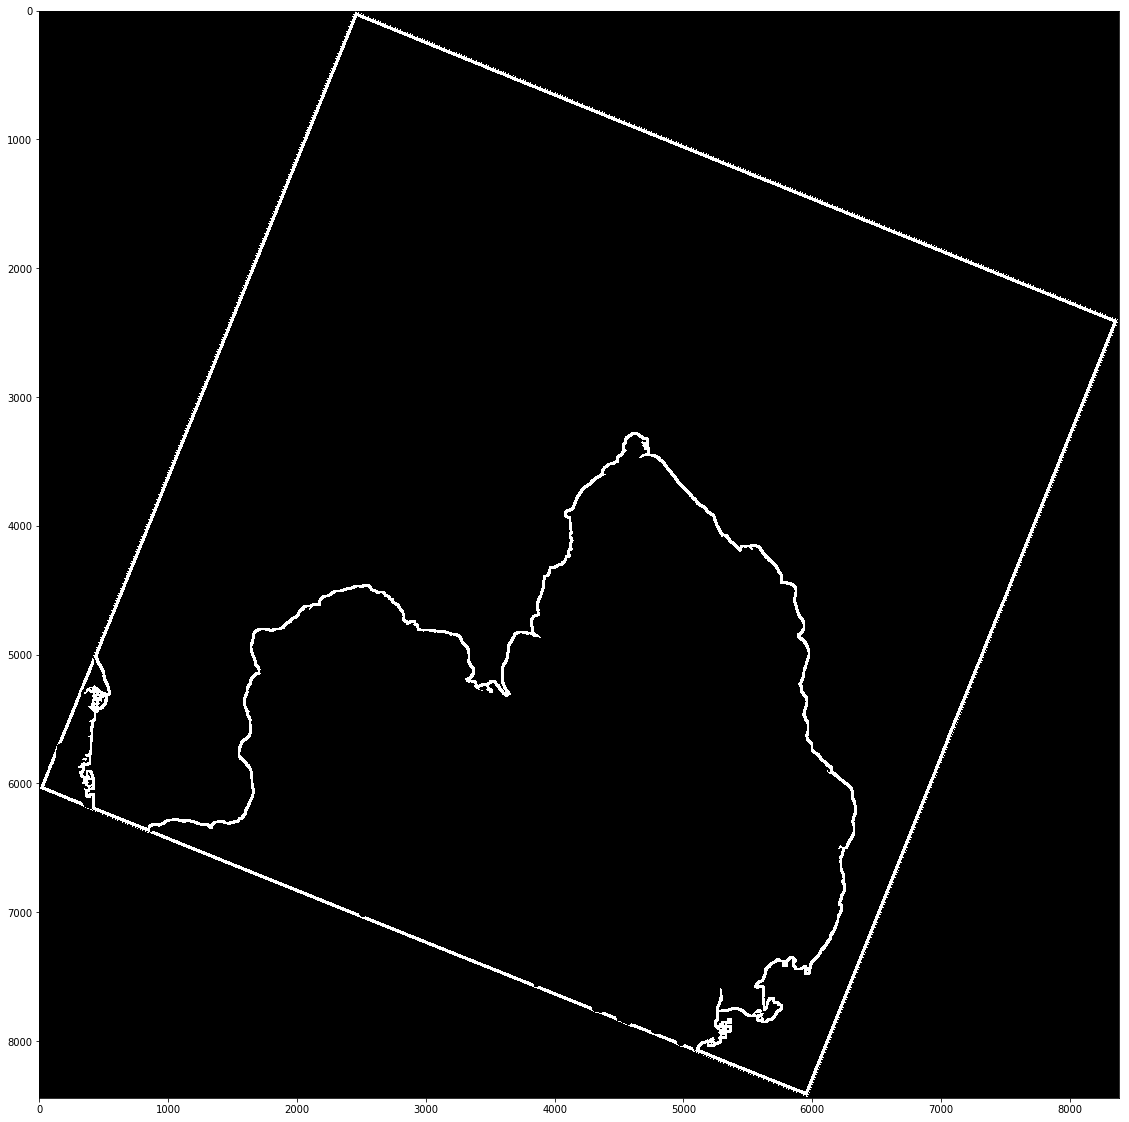

In [16]:
plt.figure(figsize = (20,20))
plt.imshow(small)

plt.show()

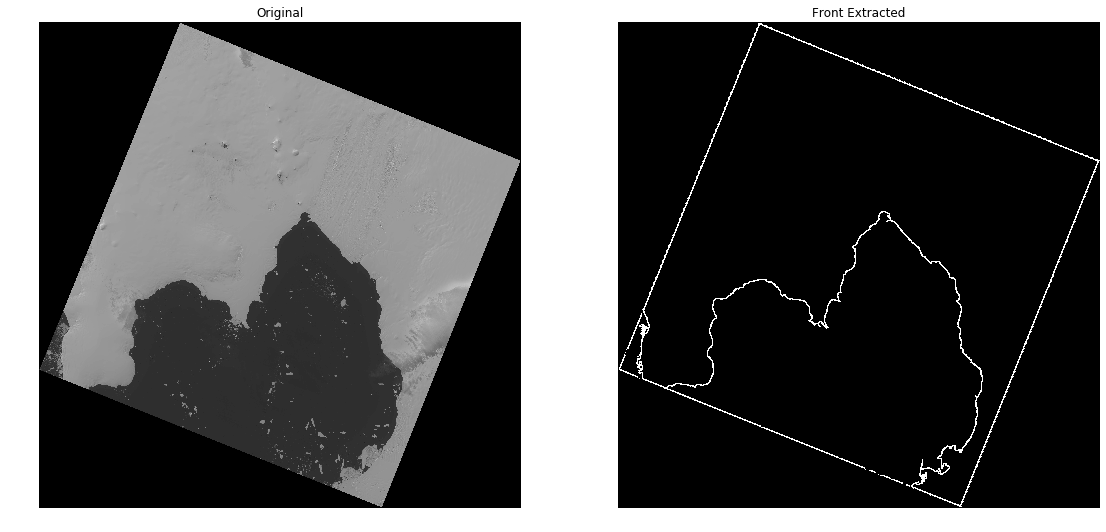

In [17]:
show_images([img5, small], 1, ['Original', 'Front Extracted'])